# DSCI 100

## Introduction
In this project, we take the data set of about 300 patients with heart diseases and use it to establish a relationship between the presence of heart disease and many different factors. We will first clean and wrangle our data and then develop an exploratory analysis on it. We will utilize bar graphs, histograms and various other visualization tools. We will attempt to develop a relationship between the presence of heart diseases and factors (that we will determine using randomForest plot below) using classification kknn model. Moreover, we will split our dataset into training and testing datasets to test our model's accuracy.

In this project, we are trying to answer the question of what factors or variables will lead to higher chances of being diagnosed with heart diseases. In summary, the research question that we're trying to answer is whether we can use the kknn classification model to determine if cholestrol, age, and heart rate is effective at providing a quick diagnosis for heart conditions / diseases.

## Methods

## We start by loading the dataset here. We have 14 variables namely

* Age
* Sex
* Cp (Chest pain of levels : 1 (typical angina), 2 (atypical angina), 3 (non-anginal pain), 4 (asymptomatic))
* trestbps (Resting blood pressure in mm Hg), chol (cholestrol in mg/dl)
* fbs (fasting blood sugar level in mg/dl)
* restecg (resting electrocardiographic results Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria Value 1: normal Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))
* thalach (maximum heart rate)
* exang (exercise induced angina)
* oldpeak(ST depressio,), slope (the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping)
* ca (number of major vessels), thal (A blood disorder called thalassemia Value 0: NULL Value 1: fixed defect (no blood flow in some part of the heart) Value 2: normal blood flow Value 3: reversible defect (a blood flow is observed but it is not normal))
* num (0 = no heart disease, 1 = heart disease)

Since our variables stand for very complex terms, we've chosen not to rename them. In the project below, whenever we mention the variables, we will include their meaning for the readers' convenience.

Since groups 1-4 in num means the presence of heart diseaes and group 0 means the absence of heart diseases. We can make reponse variable binary which 0 means the absence of heart diseases and 1 means the presence of heart diseaes.

In [75]:
library(tidyverse)
library(readr)
library(tidymodels)
library(ggplot2)
library(repr)
library(GGally)

df<-read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",col_names = FALSE)
df1<-separate(df,X1,sep = ",",into =c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca",'thal','num'))


df1$age<-as.numeric(df1$age)
df1$sex<-as.factor(df1$sex)
df1$cp<-as.factor(df1$cp)
df1$trestbps<-as.numeric(df1$trestbps)
df1$chol<-as.numeric(df1$chol)
df1$fbs<-as.factor(df1$fbs)
df1$restecg<-as.factor(df1$restecg)
df1$thalach<-as.numeric(df1$thalach)
df1$exang<-as.factor(df1$exang)
df1$oldpeak<-as.numeric(df1$oldpeak)
df1$slope<-as.factor(df1$slope)
df1$ca<-as.factor(df1$ca)
df1$thal<-as.factor(df1$thal)
df1$num<-as.factor(df1$num)
df1$num<-replace(df1$num,df1$num %in% c("1", "2", "3", "4"),"1")


Parsed with column specification:
cols(
  X1 = col_character()
)



In [77]:
df2<-df1%>%droplevels()
nrow(df2)
levels(df2$num)

[1] 303

[1] "0" "1"

Firstly we set the seed 123 to make sure the code is reproducible. To test the accuracy of our model, we split our data into testing and training data. Here 70% of our data will be used to generate our classification model, while 30% will be used to test the model.

In [78]:
set.seed(123)
df_splited<-initial_split(df2,prop=0.7,strata=num)
train_set <- training(df_splited)
test_set <- testing(df_splited)

head(train_set)
head(test_set)
nrow(train_set)
nrow(test_set)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1.0,1.0,145,233,1.0,2.0,150,0.0,2.3,3.0,0.0,6.0,0
67,1.0,4.0,160,286,0.0,2.0,108,1.0,1.5,2.0,3.0,3.0,1
67,1.0,4.0,120,229,0.0,2.0,129,1.0,2.6,2.0,2.0,7.0,1
37,1.0,3.0,130,250,0.0,0.0,187,0.0,3.5,3.0,0.0,3.0,0
41,0.0,2.0,130,204,0.0,2.0,172,0.0,1.4,1.0,0.0,3.0,0
56,1.0,2.0,120,236,0.0,0.0,178,0.0,0.8,1.0,0.0,3.0,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1.0,4.0,130,254,0.0,2.0,147,0.0,1.4,2.0,1.0,7.0,1
56,0.0,2.0,140,294,0.0,2.0,153,0.0,1.3,2.0,0.0,3.0,0
56,1.0,3.0,130,256,1.0,2.0,142,1.0,0.6,2.0,1.0,6.0,1
49,1.0,2.0,130,266,0.0,0.0,171,0.0,0.6,1.0,0.0,3.0,0
64,1.0,1.0,110,211,0.0,2.0,144,1.0,1.8,2.0,0.0,3.0,0
60,1.0,4.0,117,230,1.0,0.0,160,1.0,1.4,1.0,2.0,7.0,1


[1] 213

[1] 90

This plot shows the distribution of number of major vessels (0-3) colored by fluoroscopy through the diagnosis of heart disease's presence. 

* Through the plot, we can see most people only has 0 major vessel colored by fluoroscopy in the group 0(group with the absence from heart disease). 

* Most people has 0-2 major vessels colored by fluoroscopy in group 1(they have similar propotions and the propotion of people with 0 and 1 major vessel is slightly larger than people with 2). Also, only few people have 3 in group 1(group with the presence from heart disease). 

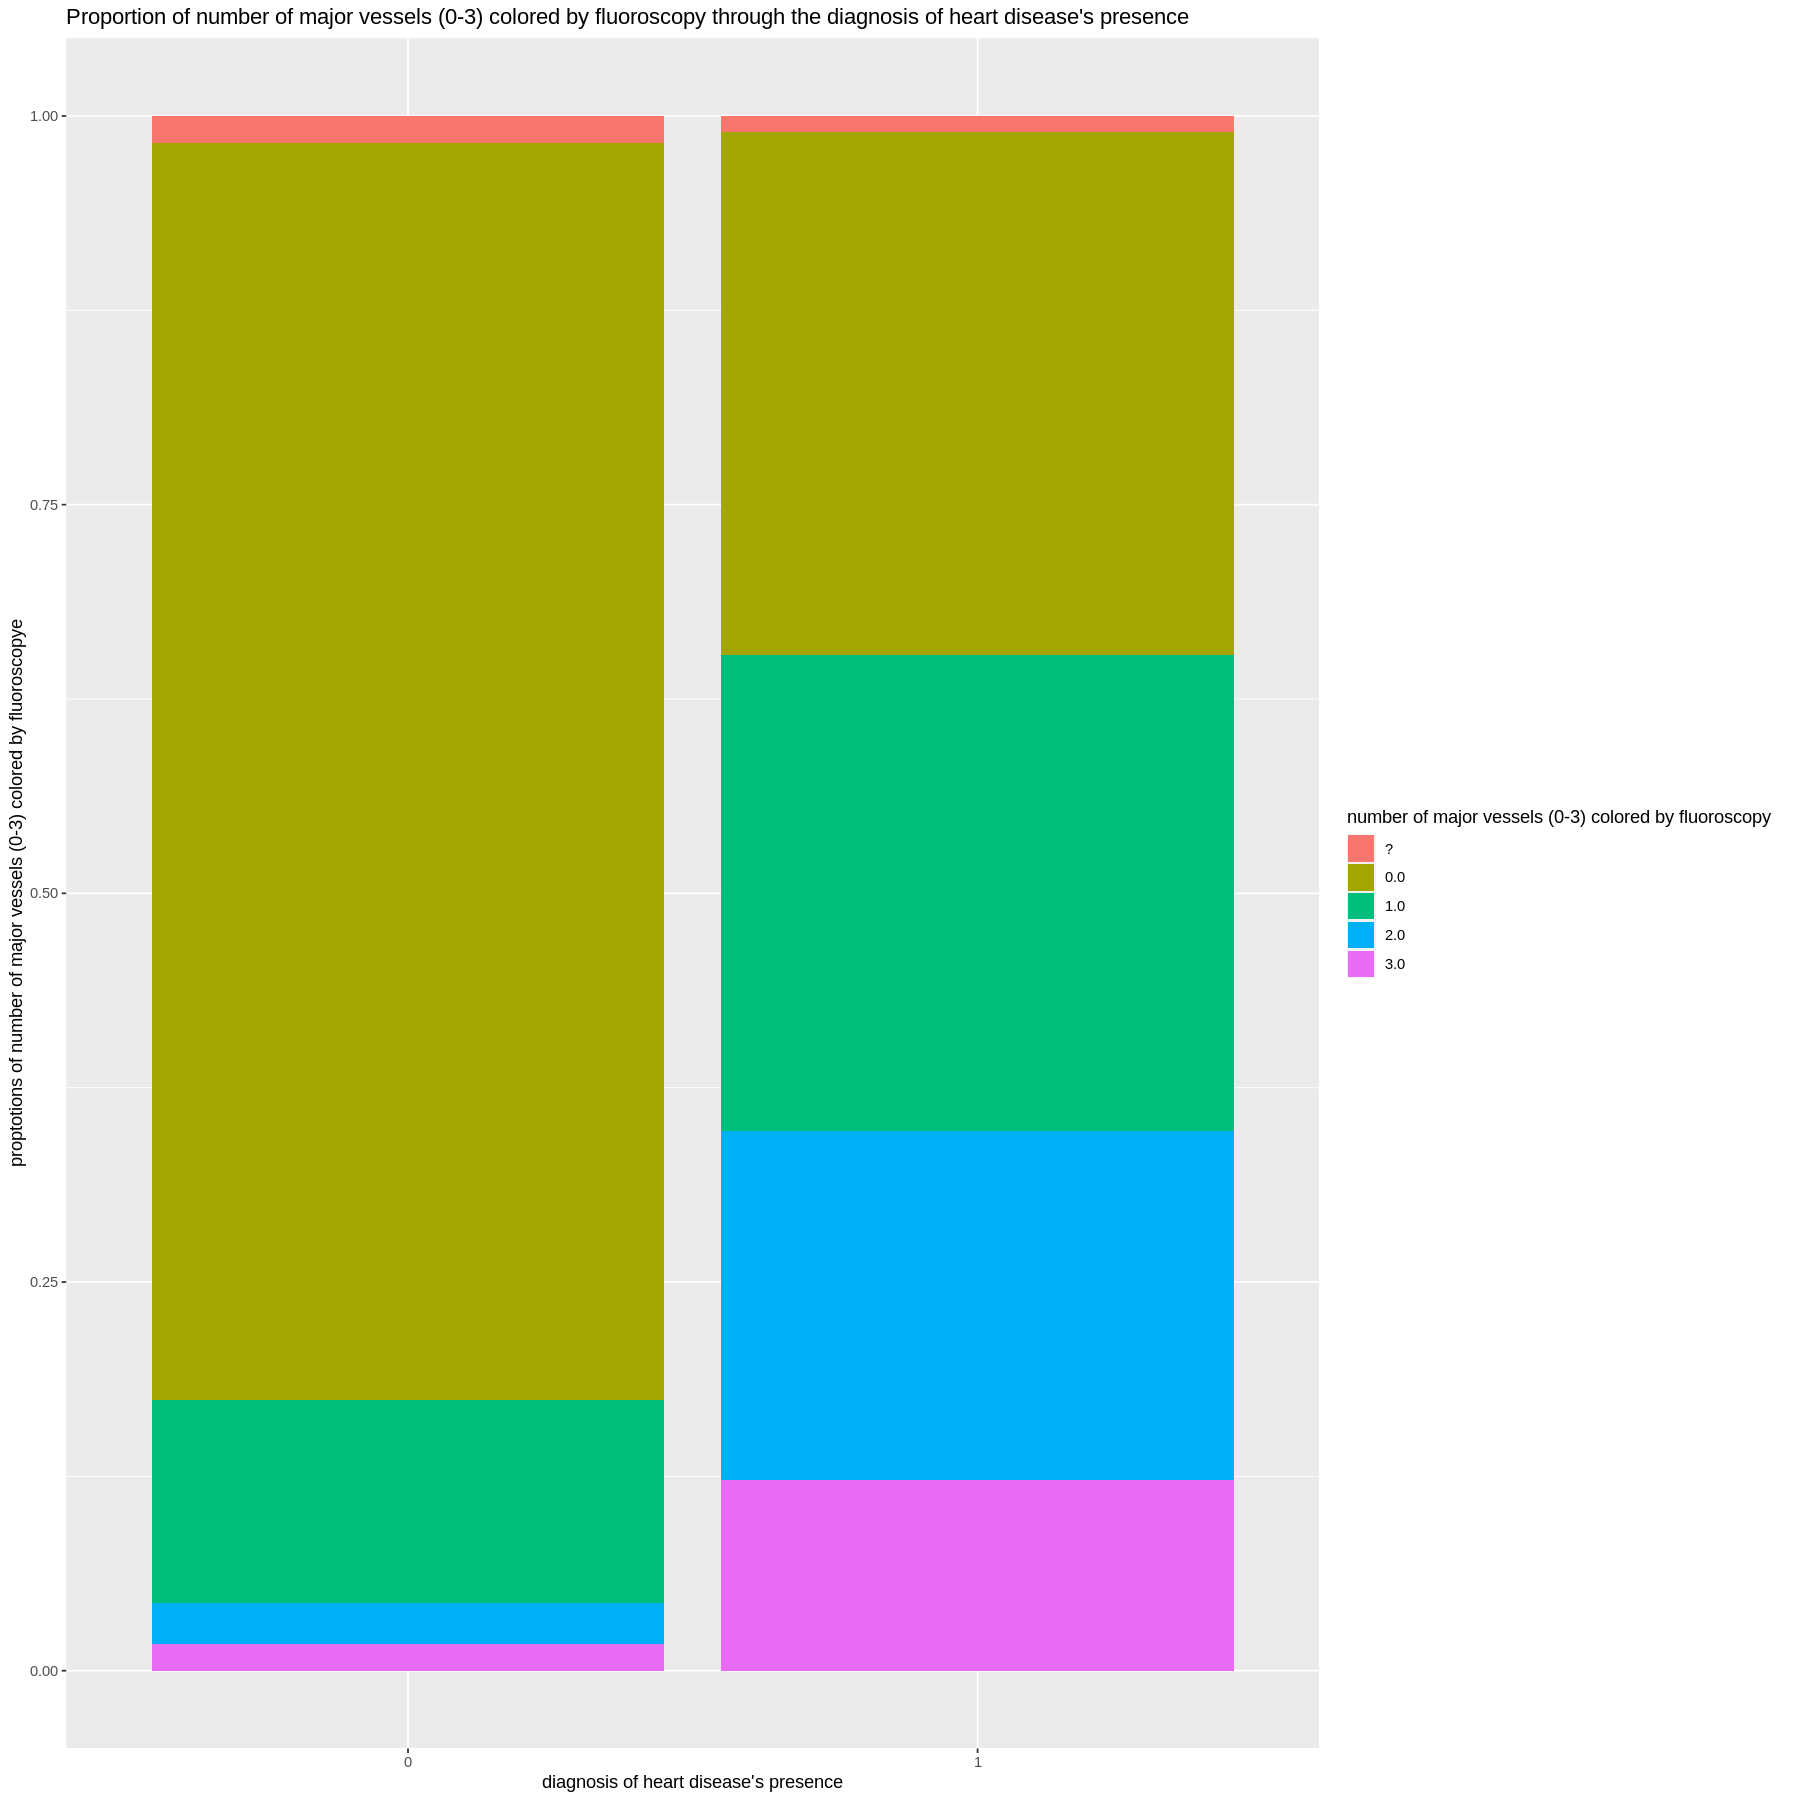

In [135]:
options(repr.plot.height = 15, repr.plot.width = 15)

train_set%>%ggplot(aes(x=num,fill=ca))+geom_bar(position="fill")+
labs(x="diagnosis of heart disease's presence",y="proptotions of number of major vessels (0-3) colored by fluoroscopye",fill="number of major vessels (0-3) colored by fluoroscopy")+
ggtitle("Proportion of number of major vessels (0-3) colored by fluoroscopy through the diagnosis of heart disease's presence")


In this plot, we can see most people have asymptomatic chest pain in the group with presence of heart disease(group1)

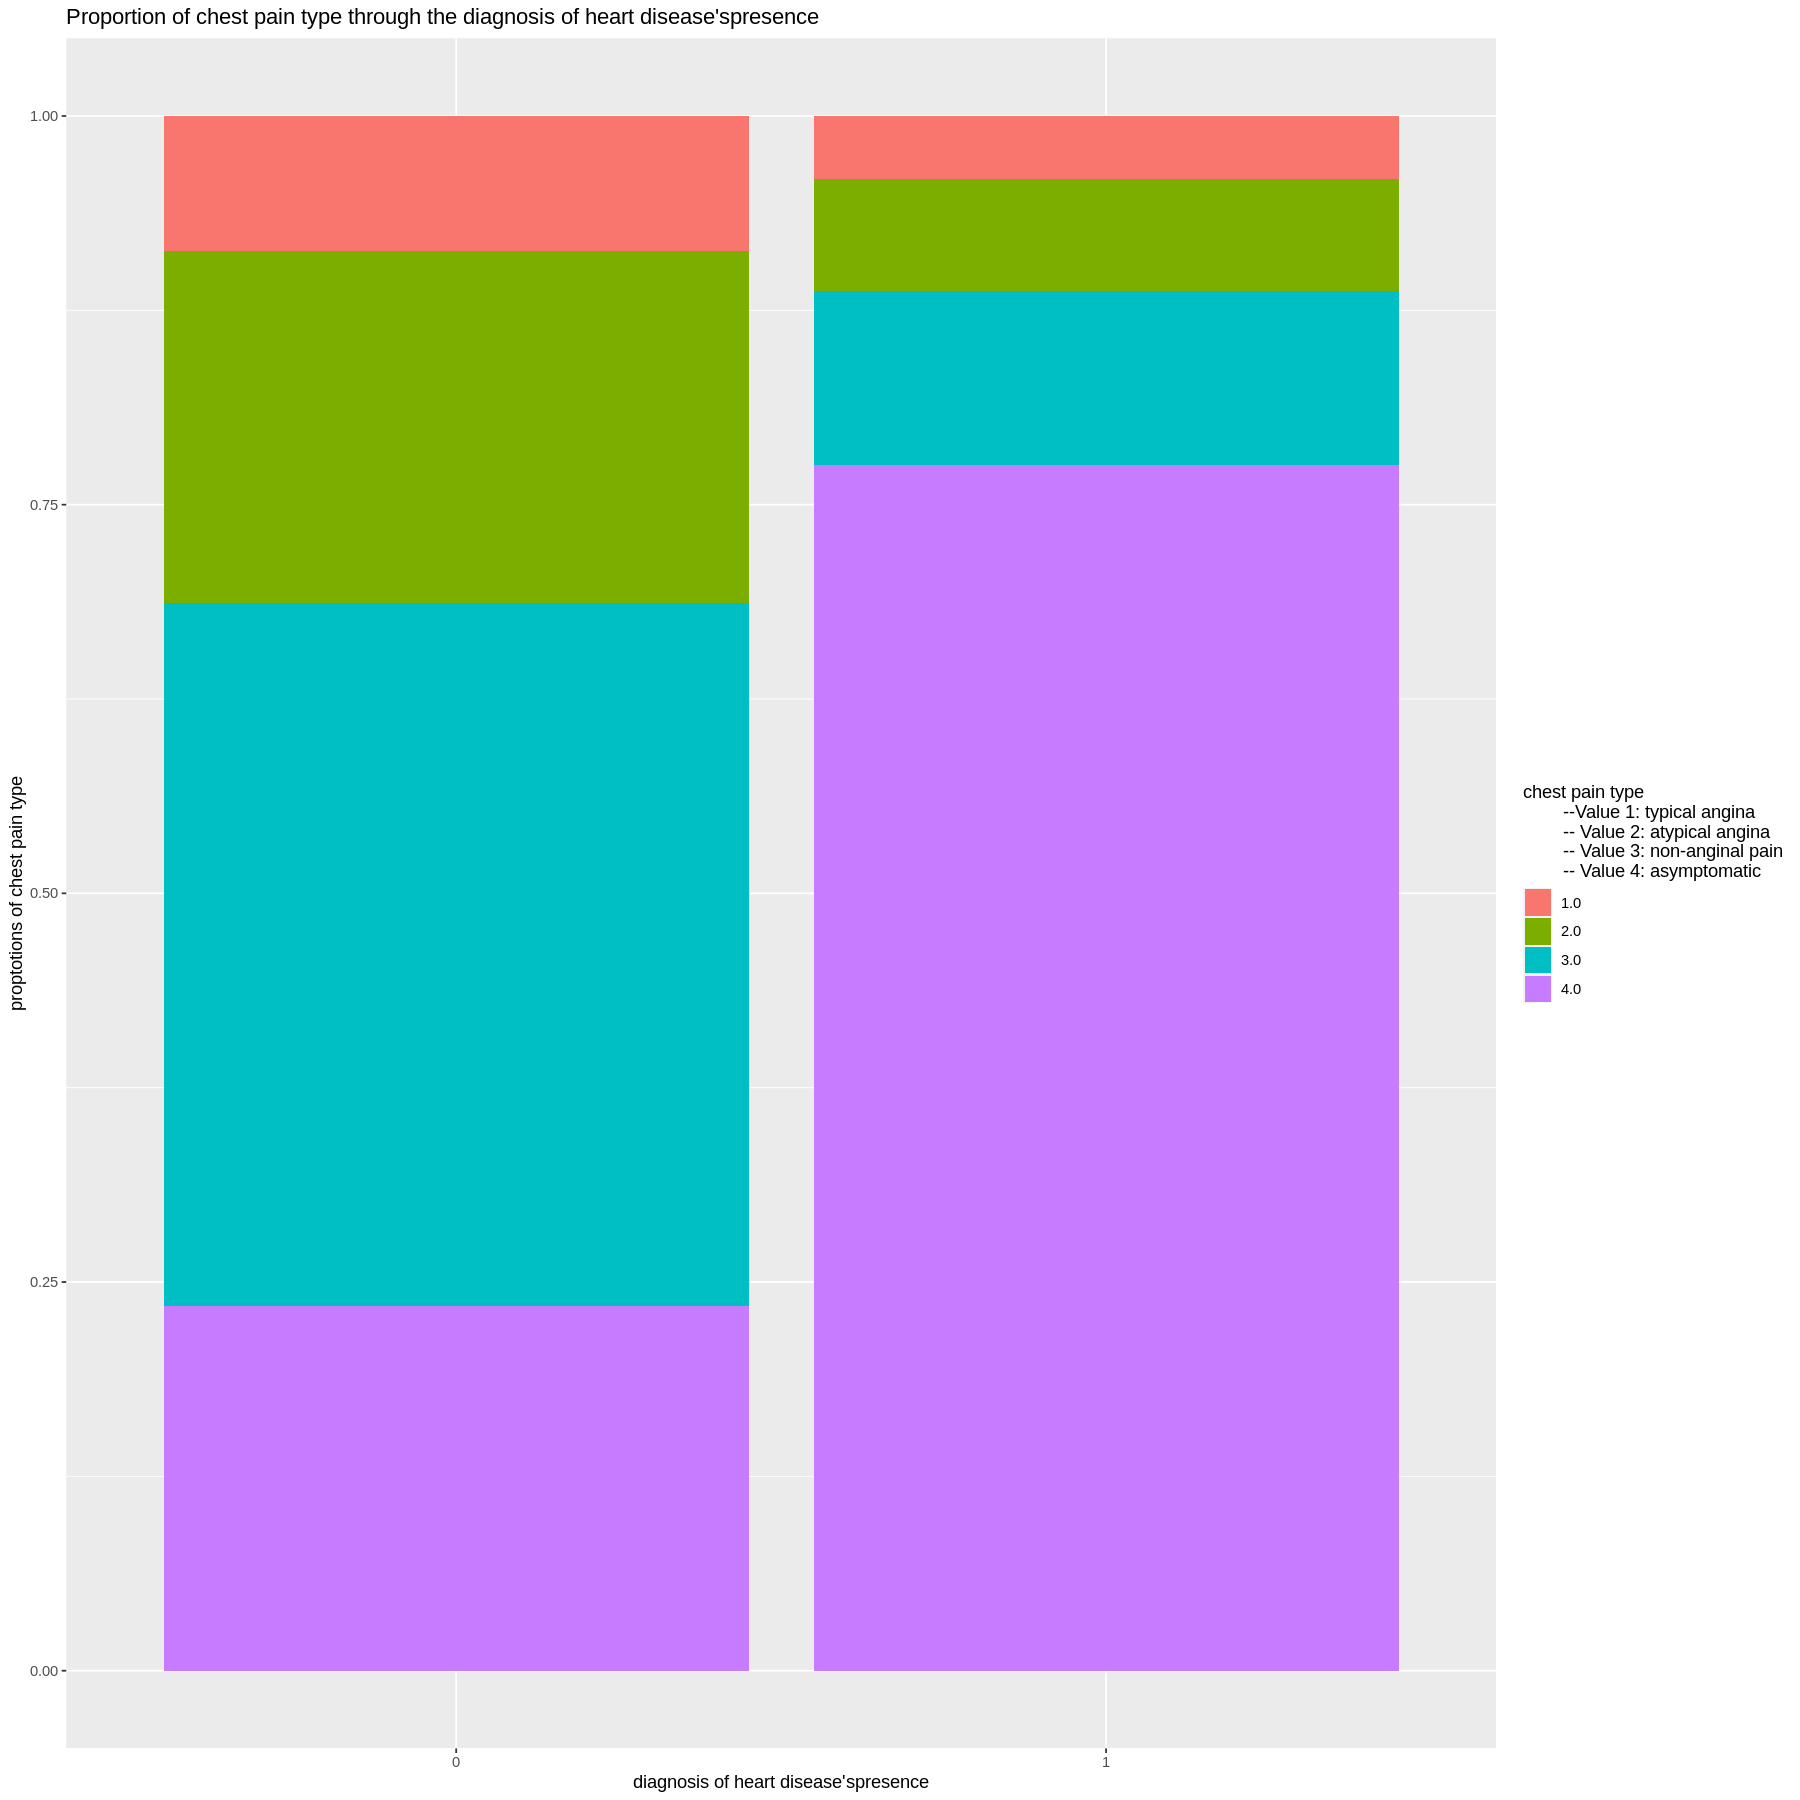

In [137]:
options(repr.plot.height = 15, repr.plot.width = 15)

train_set%>%ggplot(aes(x=num,fill=cp))+geom_bar(position="fill")+
labs(x="diagnosis of heart disease'spresence",y="proptotions of chest pain type",fill="chest pain type 
        --Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic")+
ggtitle("Proportion of chest pain type through the diagnosis of heart disease'spresence ")


In this histogram, we can see more people have the presence of heart dieases after 55.

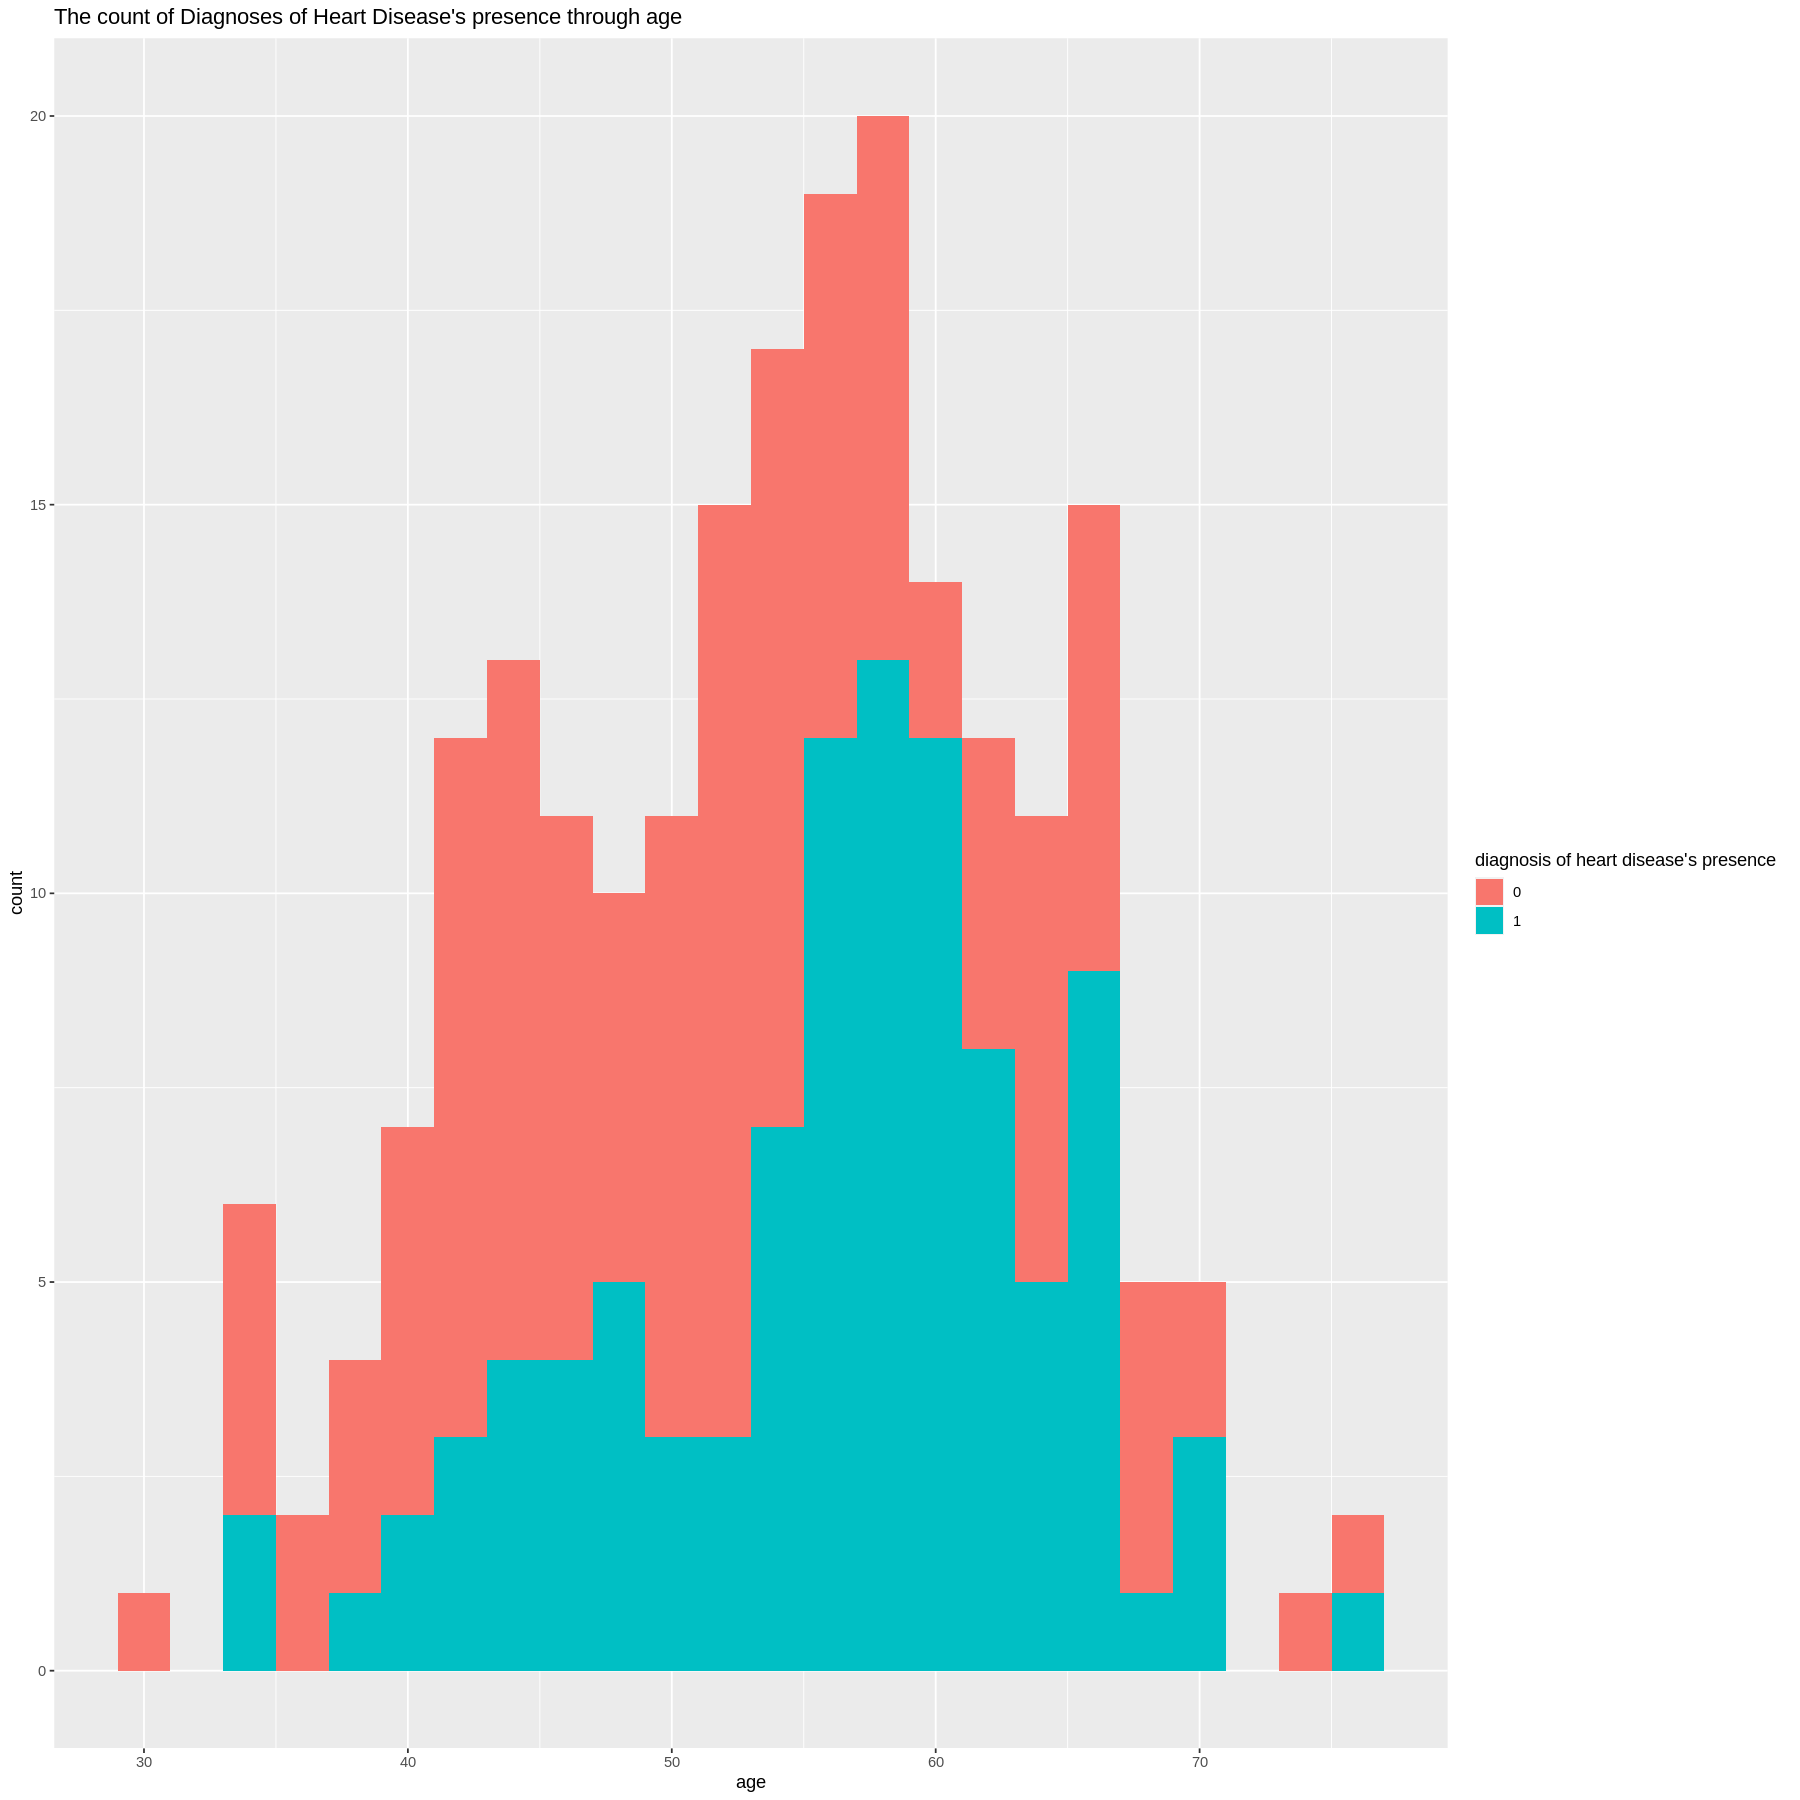

In [127]:
options(repr.plot.height = 15, repr.plot.width = 15)

train_set%>%ggplot(aes(x=age,fill=num))+geom_histogram(binwidth=2)+labs(x="age",fill="diagnosis of heart disease's presence")+
ggtitle("The count of Diagnoses of Heart Disease's presence through age")


In this histogram, we can see more people have the absence of heart diseases when the maximum heart rate achieved increases.

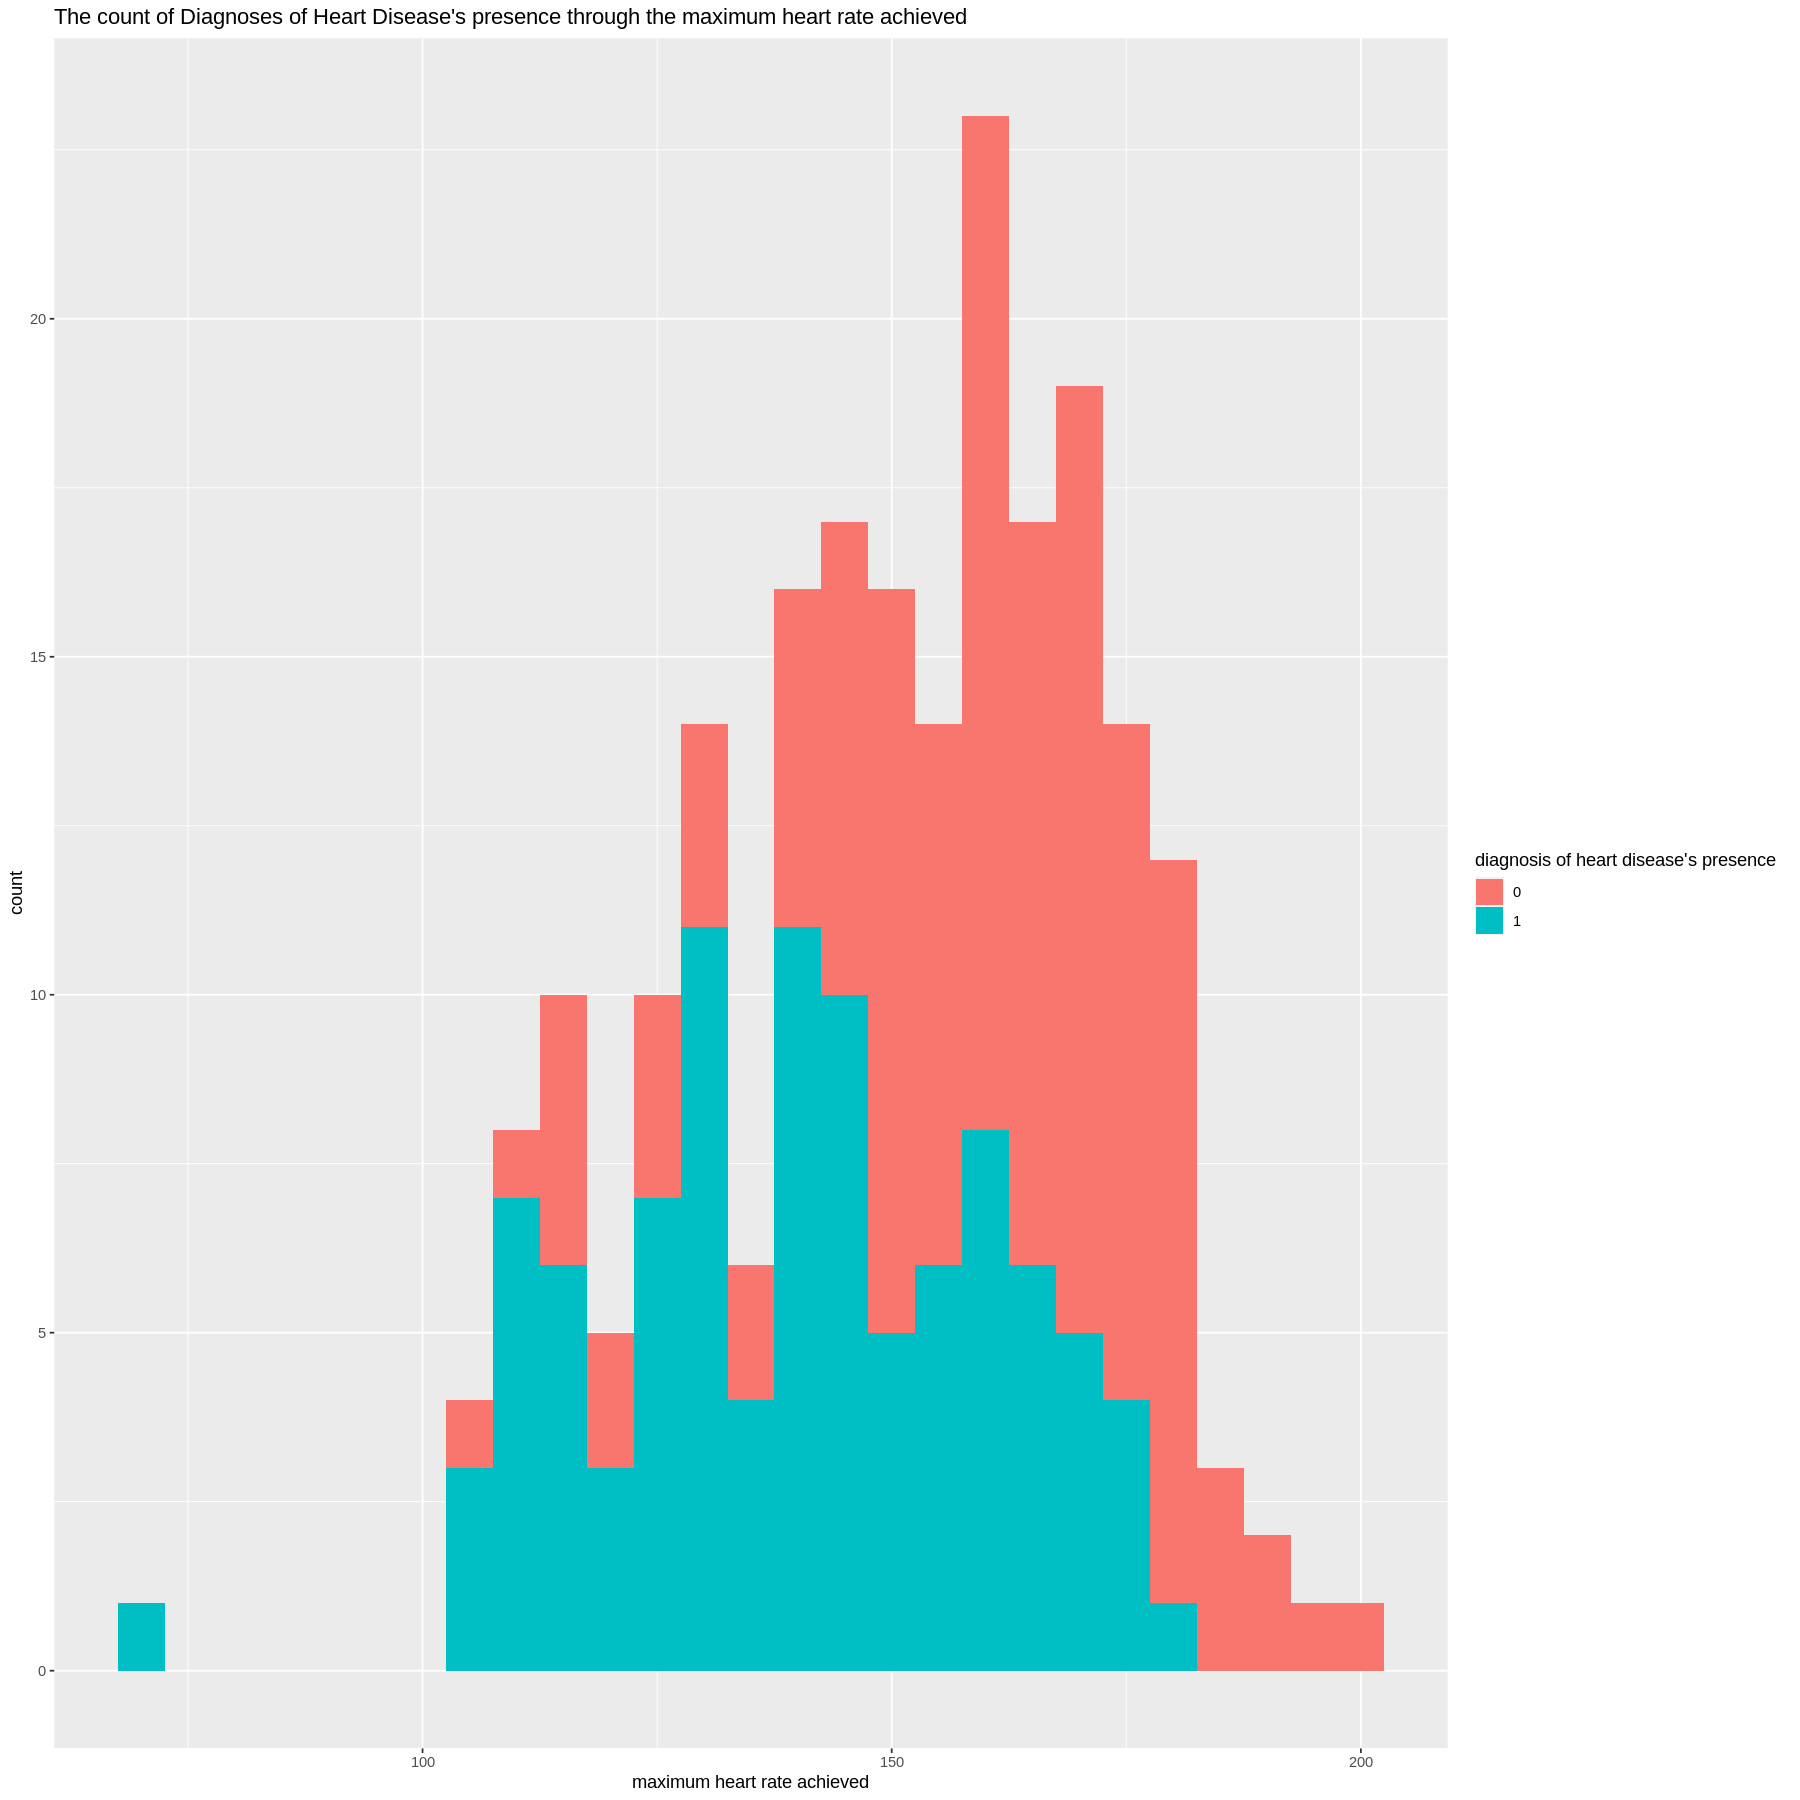

In [130]:
train_set%>%ggplot(aes(x=thalach,fill=num))+geom_histogram(binwidth=5)+
labs(x="maximum heart rate achieved",fill="diagnosis of heart disease's presence")+
ggtitle("The count of Diagnoses of Heart Disease's presence through the maximum heart rate achieved")

In this histogram, we can see more people have the presence of heart diseases when the ST depression induced by exercise relative to rest increases.

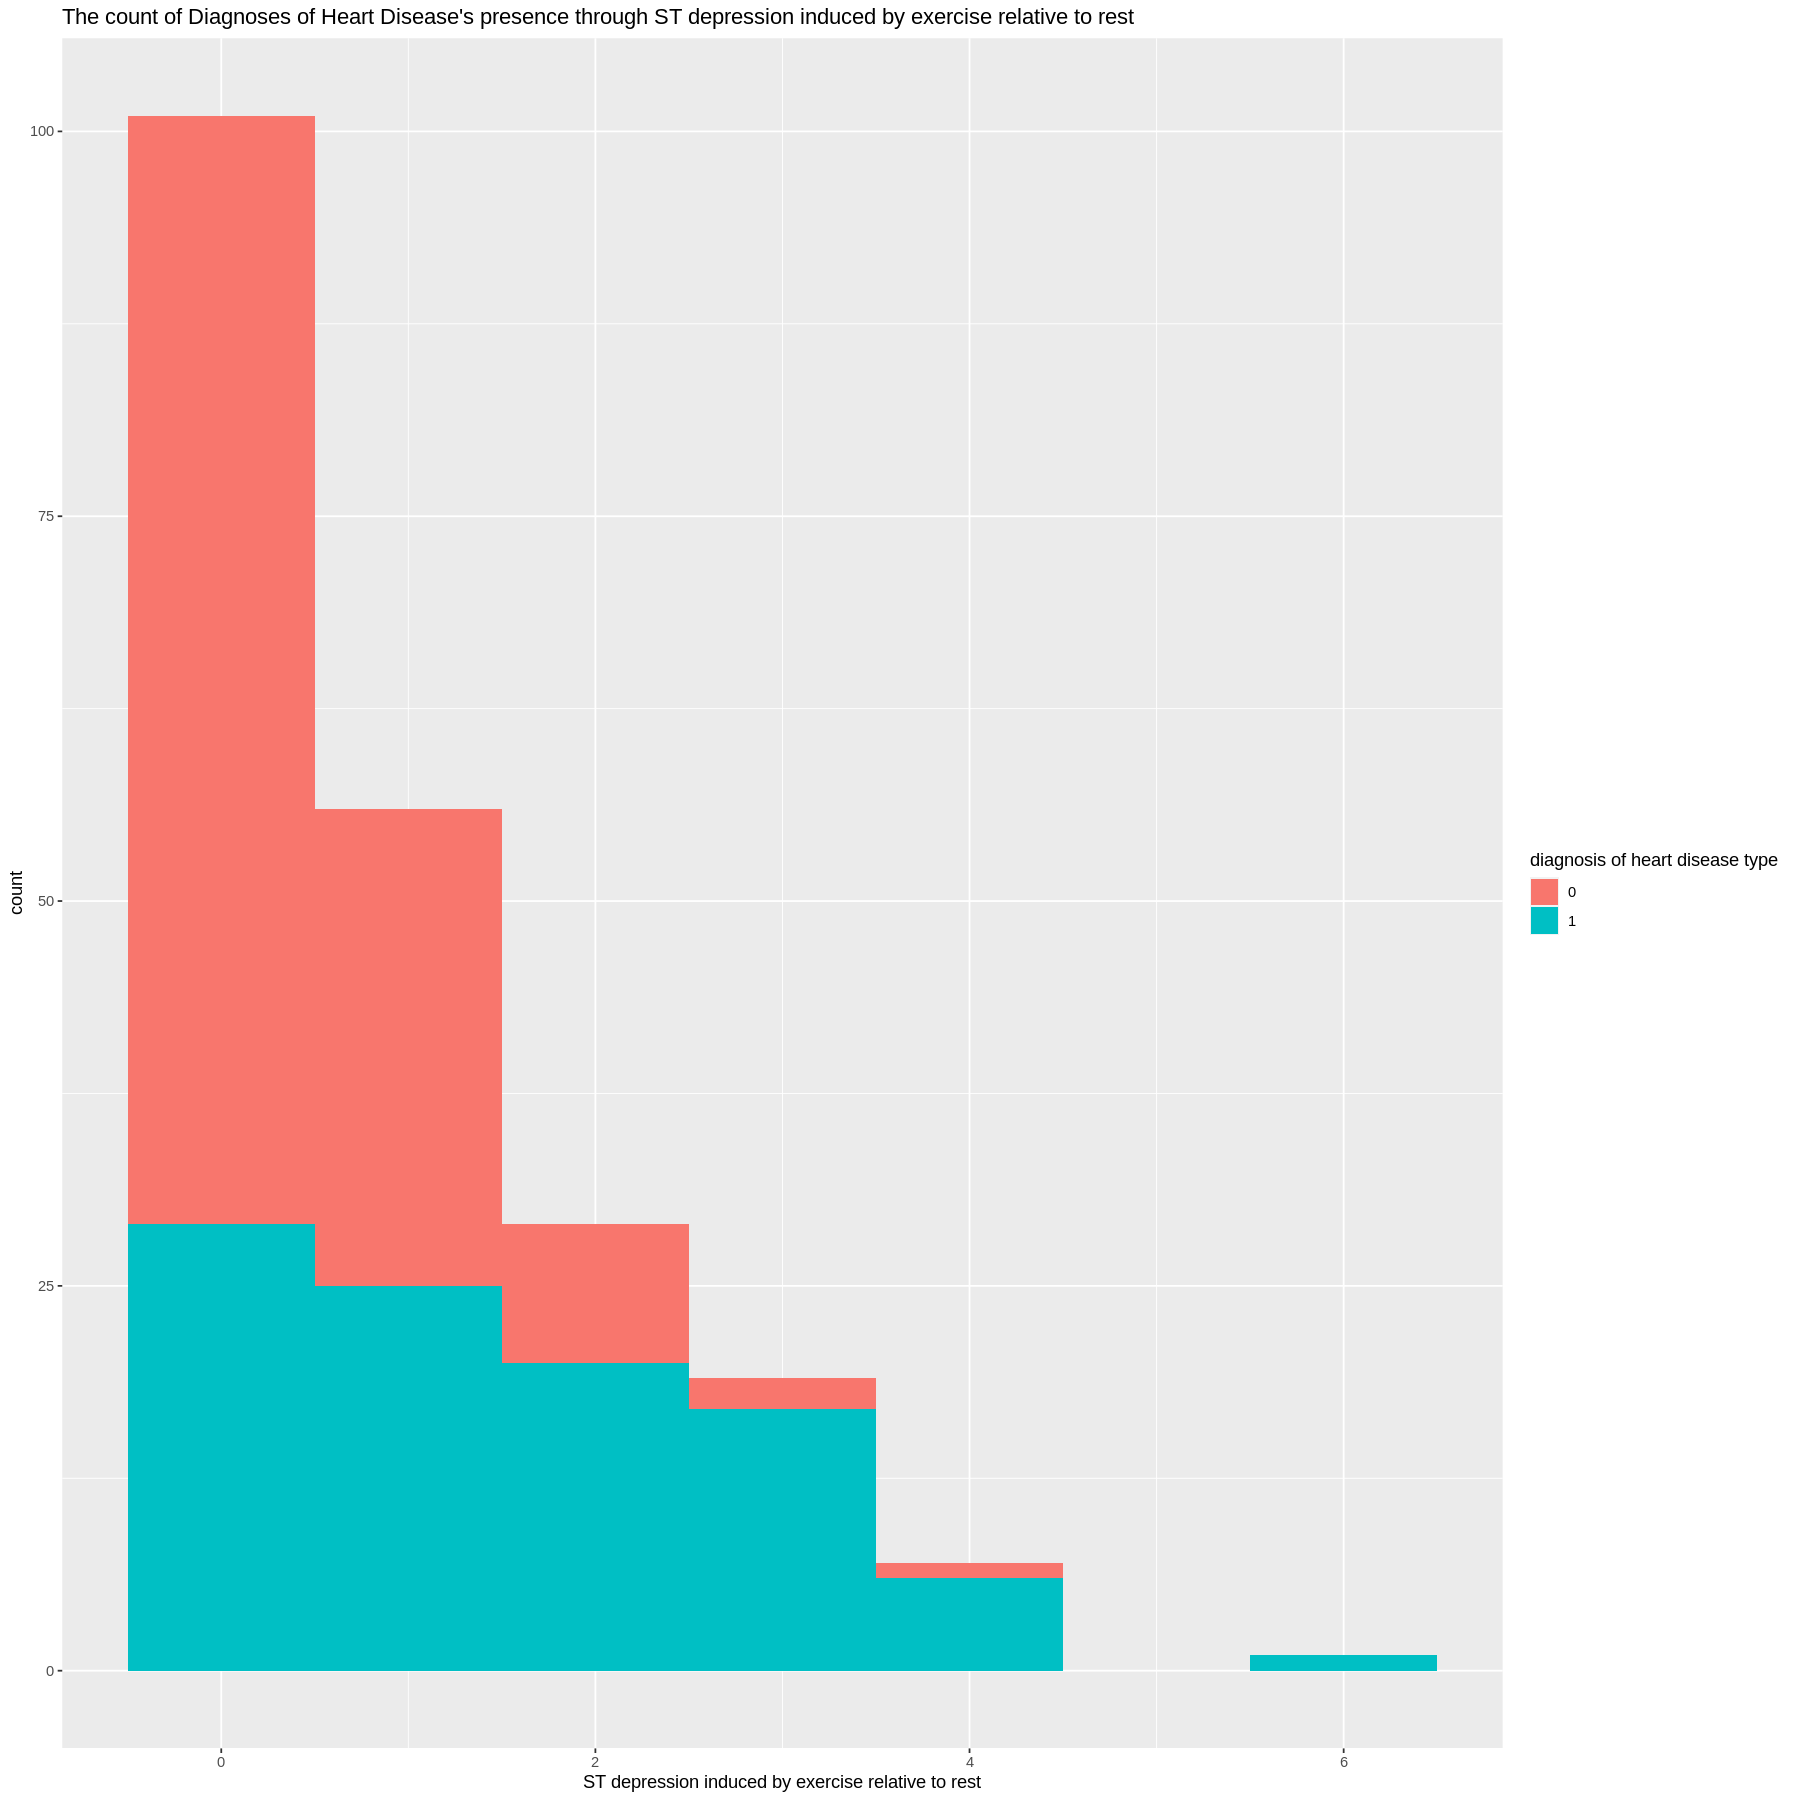

In [129]:
train_set%>%ggplot(aes(x=oldpeak,fill=num))+geom_histogram(binwidth=1)+
labs(x="ST depression induced by exercise relative to rest",fill="diagnosis of heart disease type")+
ggtitle("The count of Diagnoses of Heart Disease's presence through ST depression induced by exercise relative to rest")

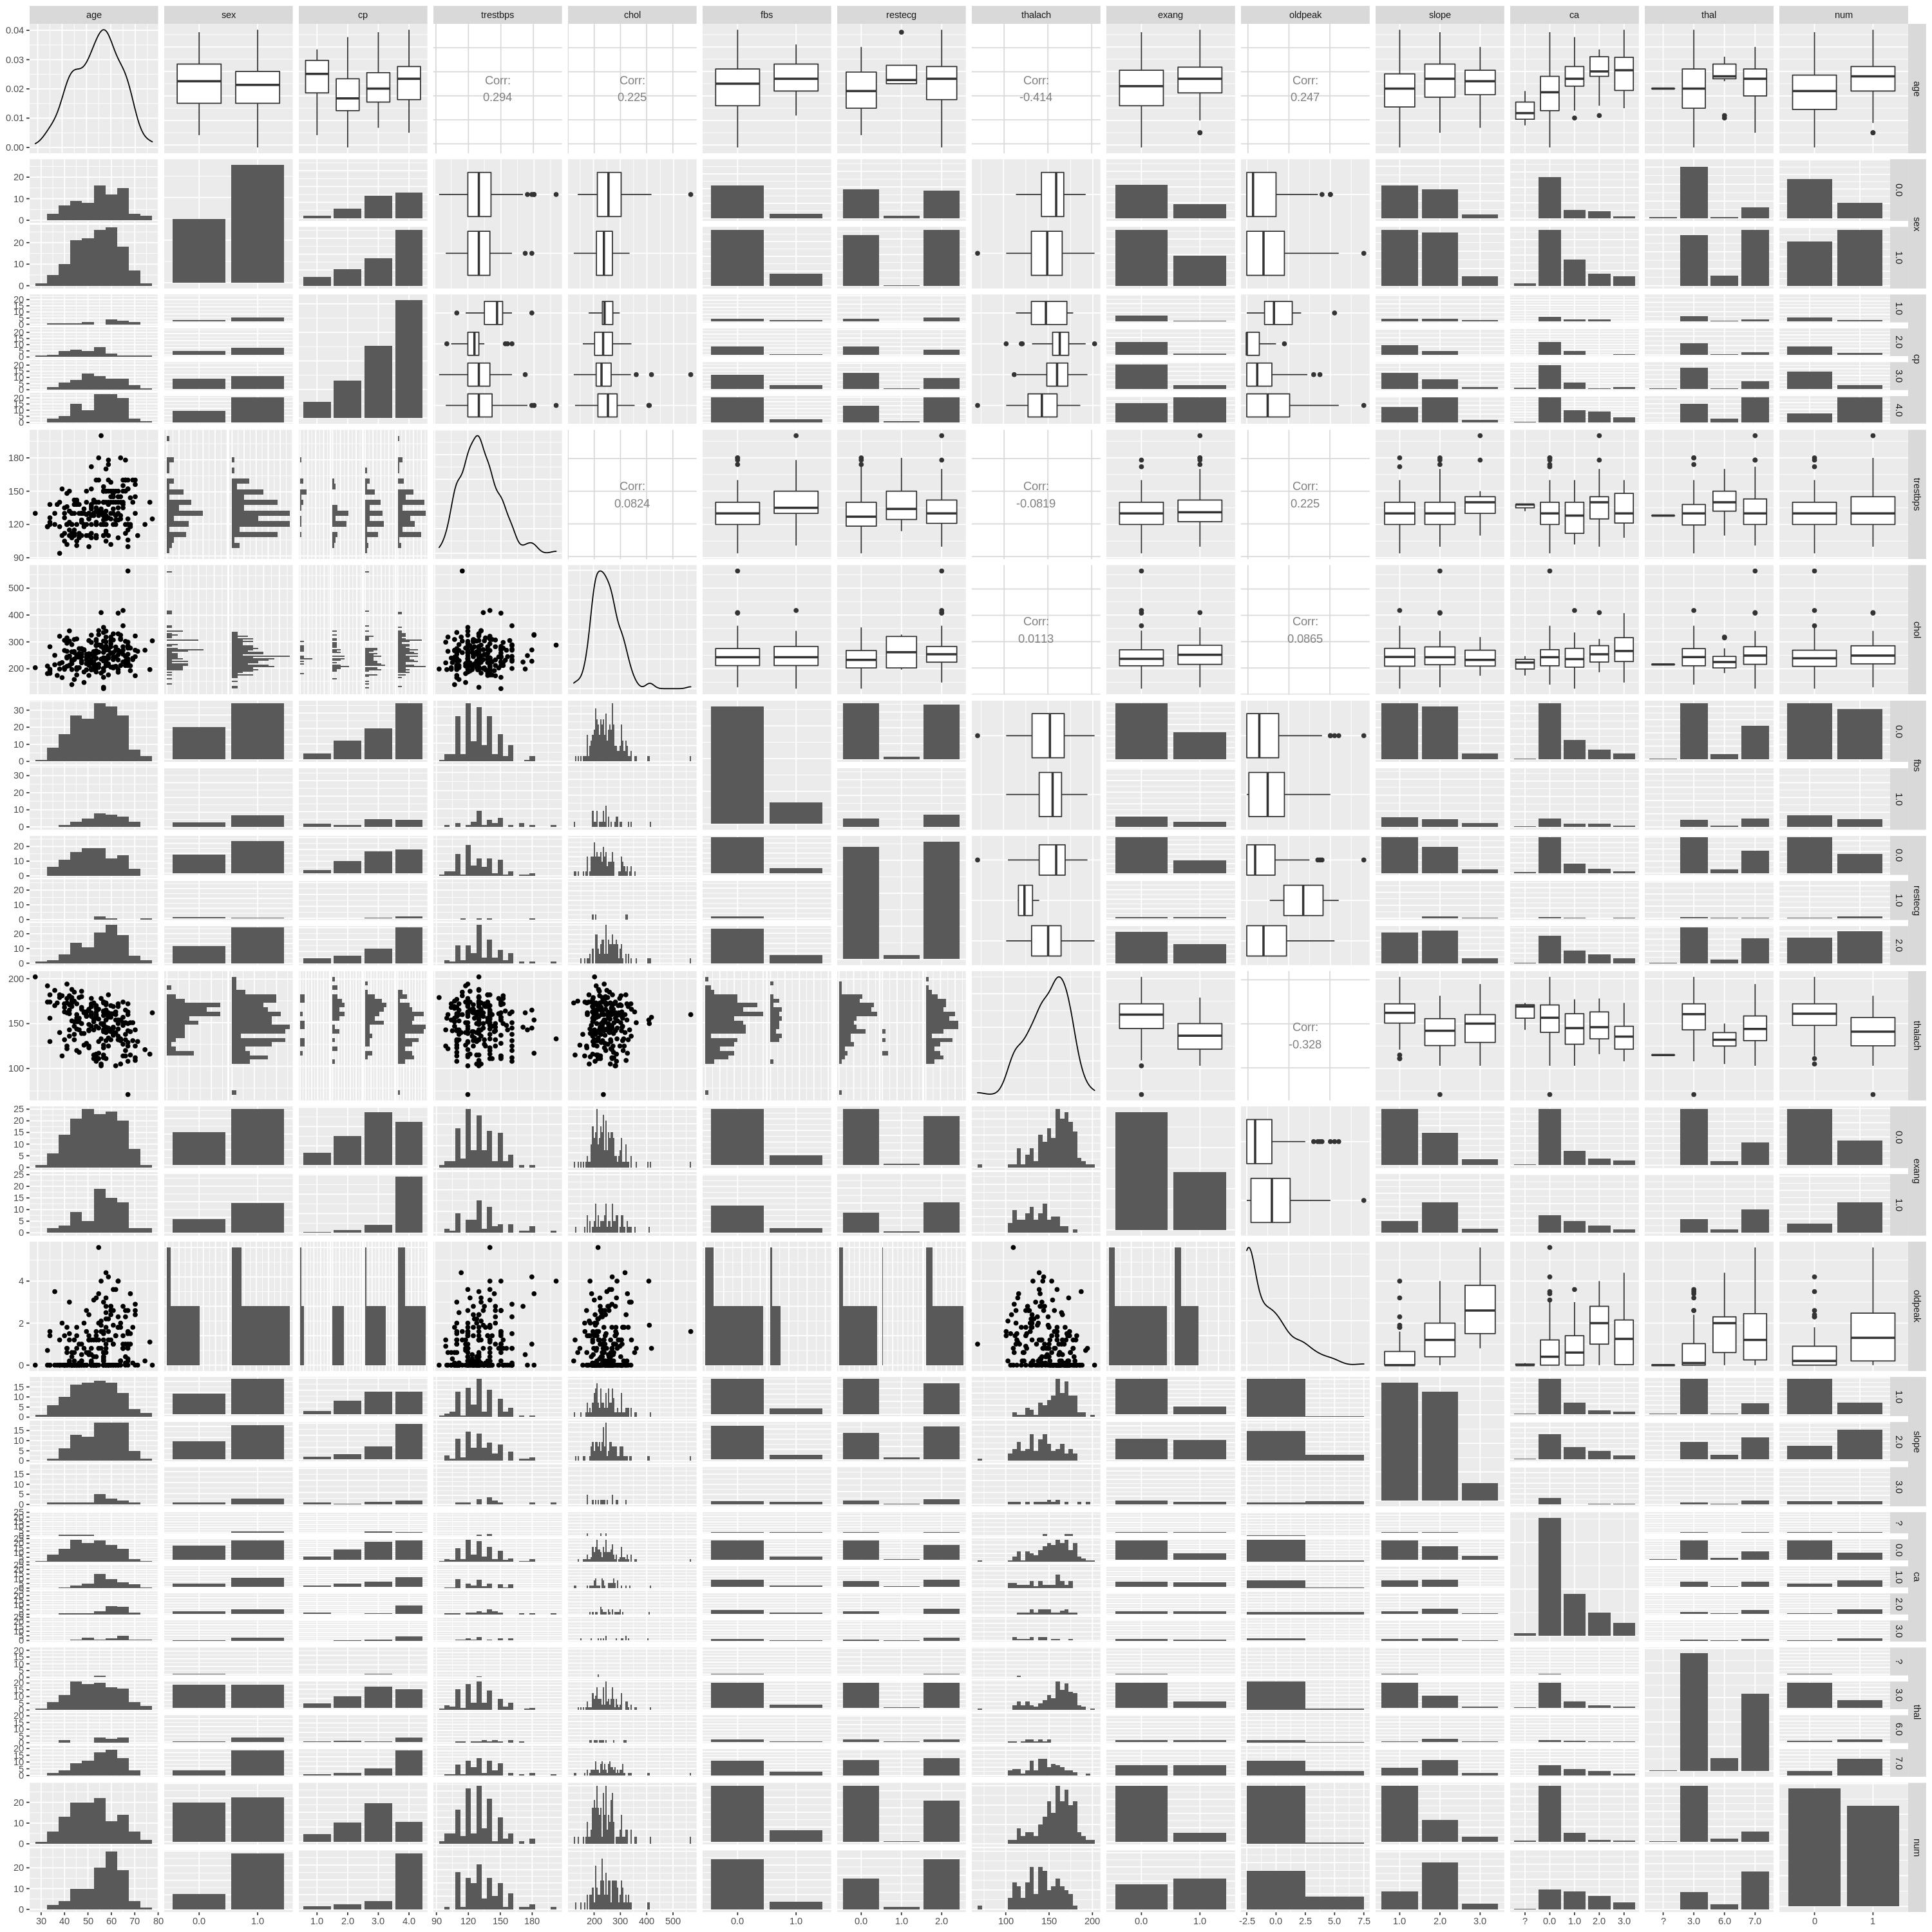

In [84]:
options(repr.plot.height = 25, repr.plot.width = 25)
train_set%>%ggpairs(lower=list(combo=wrap("facethist", binwidth=5)))

### Variable selection
We do the variable selection through the variable importance plot from the random forest library. This plot shows us that removing which variable decreases the accuracy of our model. Therefore we use the variables such that removing them would cause the greatest decrease in accuracy (ie, the most important variables.) We select the best 6 variables from the mean decrease accuracy which is thal,ca,thal,cp,oldpeak and slope. 

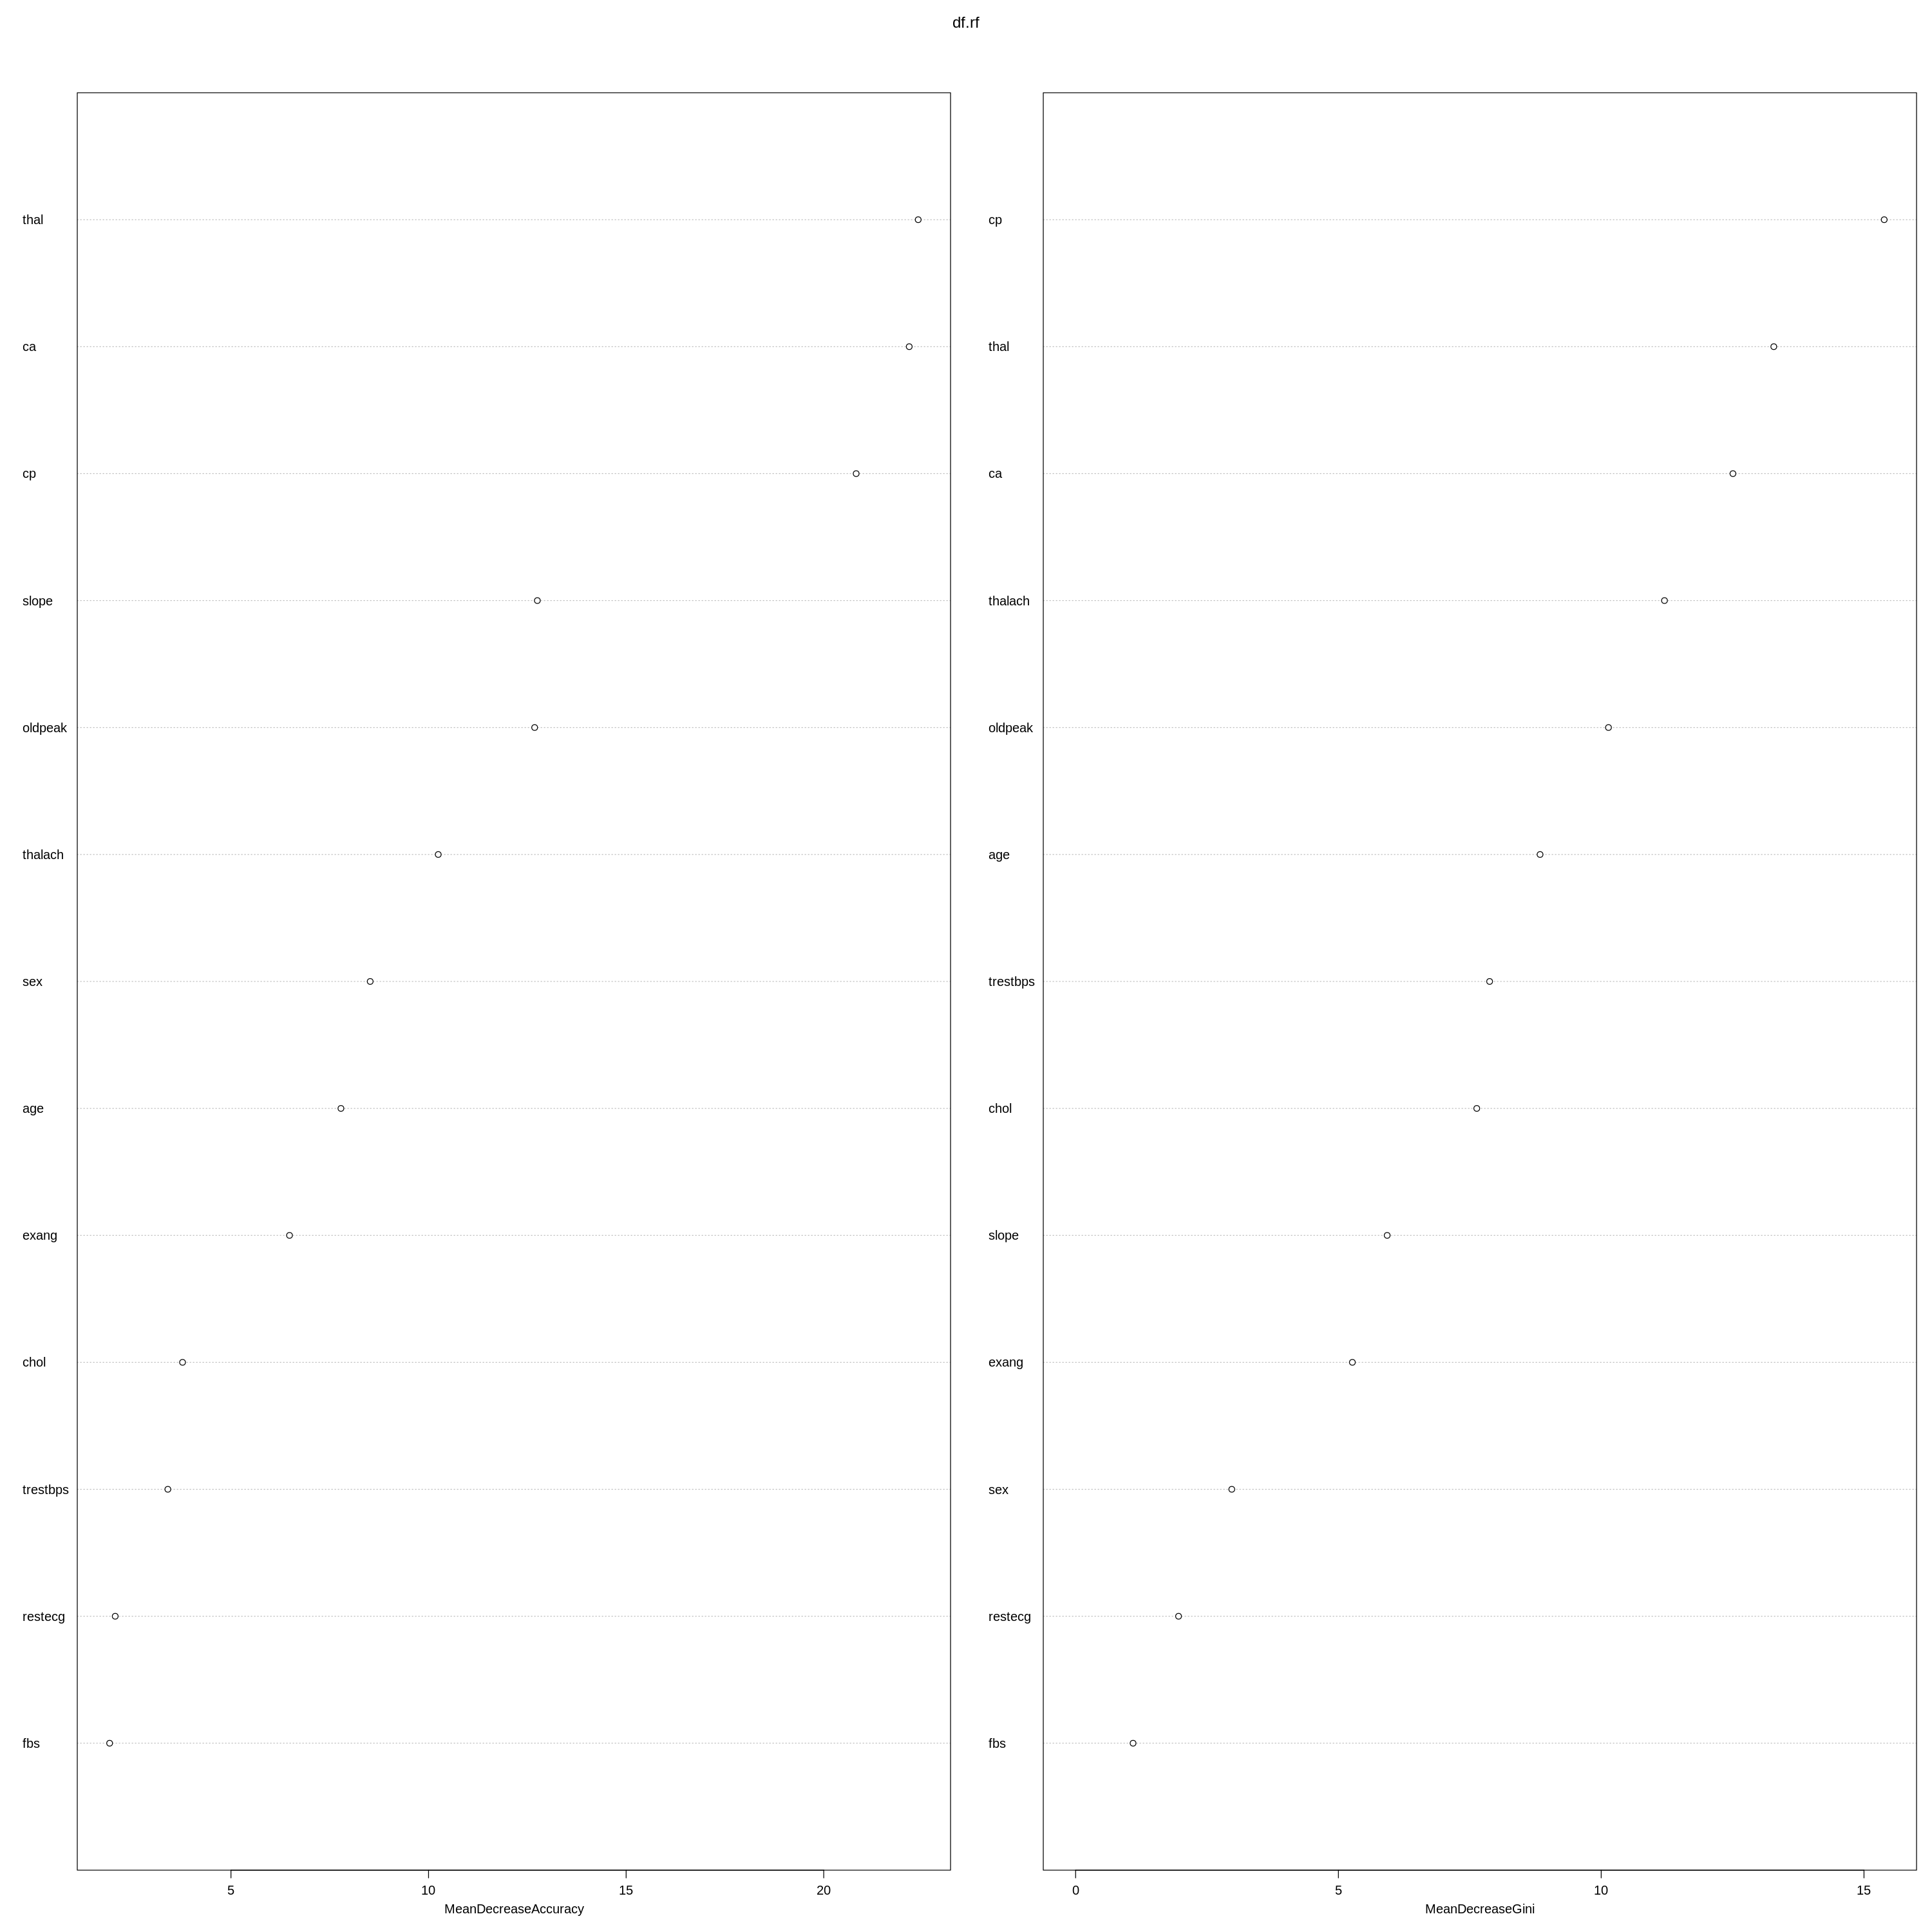

In [86]:
library(randomForest)
df.rf <- randomForest(data=train_set, num~ . , importance=TRUE, keep.forest=TRUE)

varImpPlot(df.rf)

## KNN crossvalidation
In this step we made 5 fold cross validation to choose the best K. Since we decide to do it through the workflow. We firstly set the seed to make code is reproducible. Then we make the k nearest neighbor model and the recipe for our model. Since the varaible oldpeak and thalach are numeric. We need to scale and center them to make sure that they have similar weight towards our model. After we add the recipe and model into work flow, we collect the metric and find the accuracy for each k. We visualize it through a scatter plot with geom_line(). In the plot, we see the accuracy is highest when neighbors equal to 8 which means we need to set neighbors to 8 for our final model.

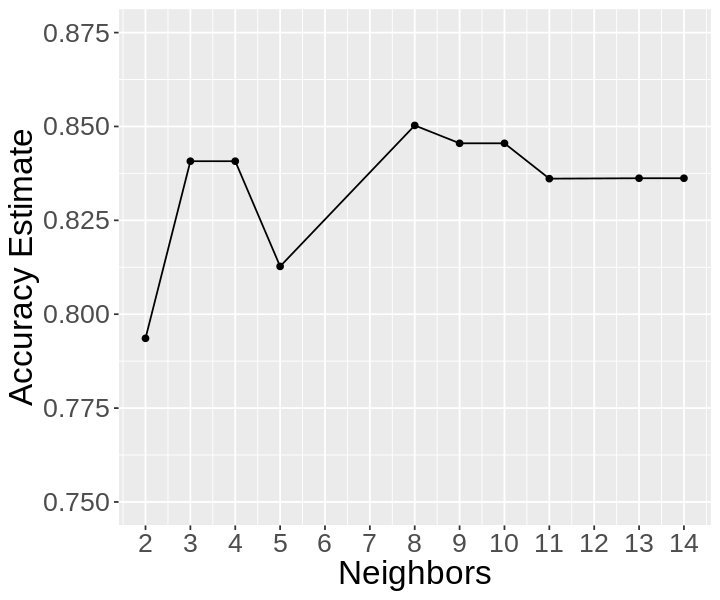

In [111]:
set.seed(123) 

options(repr.plot.height = 5, repr.plot.width = 6)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

df_recipe <- recipe(num ~thal+ca+cp+slope+oldpeak+thalach, data = train_set)%>%step_scale(oldpeak,thalach) %>%
             step_center(oldpeak,thalach)

df_vfold <- vfold_cv(train_set, v = 5, strata = num)

knn_results <- workflow() %>%
                 add_recipe(df_recipe) %>%
                 add_model(knn_spec) %>%
                 tune_grid(resamples = df_vfold, grid = 10) %>%
                 collect_metrics()

accuracies <- knn_results %>%
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20))+
                  scale_x_continuous(breaks = seq(0, 16, 1)) +
                  scale_y_continuous(limits = c(0.750, 0.875))

cross_val_plot

## Best KNN model with best 6 variable
Since we have already know that we need to set neighbors equal to 8. We can repeat the same step to fit the model and make a prediction to the testing set. Then we bind the testings set in to our predictons to calculate the accuarcy. In here, we get 80% accuracy. We also made a confusion matrix to see  the model predicts mostly wrong in which value. 

In [121]:
set.seed(123)

df_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) %>% set_engine("kknn") %>% set_mode("classification")

df_selected_recipe<-recipe(num ~thal+ca+cp+slope+oldpeak+thalach, data = train_set)%>%step_scale(oldpeak,thalach) %>%
               step_center(oldpeak,thalach)

df_knn_fit <- workflow() %>% add_recipe(df_selected_recipe) %>% add_model(df_knn_spec) %>% fit(data = train_set)

df_prediction <- predict(df_knn_fit, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = .pred_class)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = .pred_class) 
df_metrics

df_conf_mat

knn_accuracy<-df_metrics%>%slice(1)%>%pull()
knn_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8000000
kap,binary,0.5984135


          Truth
Prediction  0  1
         0 39  8
         1 10 33

[1] 0.8

## Appendix

Since we know there are many different models for doing the classification. We decide to fit some different models and see which model has the best perfomance.

## Setting the tuning parameters for random forest model

In [113]:
reps=5
varz = c(1,2,3,4,6)
nodez = c(1,3,5,7,10)

NS = length(nodez)
M = length(varz)
rf.oob = matrix(NA, nrow=M*NS, ncol=reps)

for(r in 1:reps){
  print(paste0(r, "of", reps))
  counter=1
  for(m in varz){
    for(ns in nodez){
      df.rfm <- randomForest(data=train_set, num~thal+ca+cp+slope+oldpeak+thalach, 
                              mtry=m, nodesize=ns)
      rf.oob[counter,r] = mean(predict(df.rfm, type="response") != train_set$num)
      counter=counter+1
    }
  }
}

[1] "1of5"
[1] "2of5"
[1] "3of5"
[1] "4of5"
[1] "5of5"


2|7       3|7      2|10       3|5      3|10       4|7       2|5       2|3 
0.1492958 0.1539906 0.1558685 0.1558685 0.1558685 0.1558685 0.1577465 0.1586854 
     6|10      4|10       4|5       6|7       6|5       1|7       1|1       3|3 
0.1596244 0.1615023 0.1643192 0.1643192 0.1652582 0.1671362 0.1690141 0.1690141 
      1|3      1|10       1|5       2|1       4|3       6|3       3|1       4|1 
0.1699531 0.1708920 0.1727700 0.1755869 0.1755869 0.1896714 0.1915493 0.1953052 
      6|1 
0.2112676

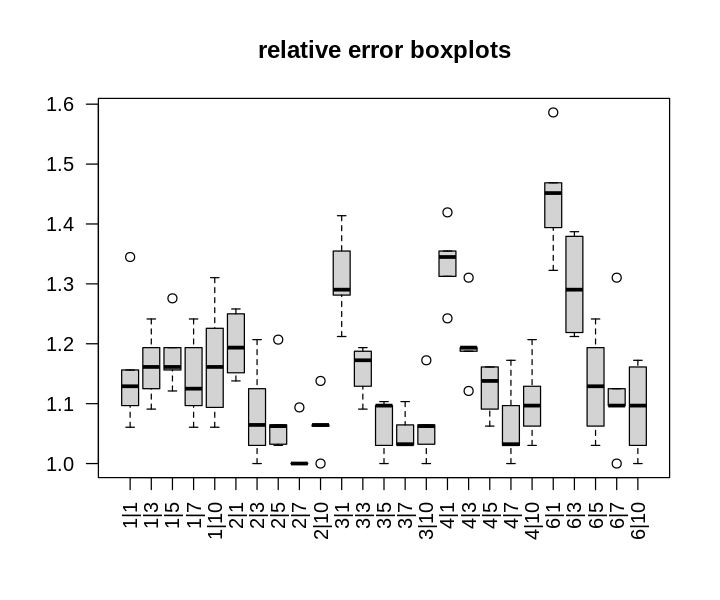

In [114]:
parms = expand.grid(nodez,varz)
row.names(rf.oob) = paste(parms[,2], parms[,1], sep="|")

mean.oob = apply(rf.oob, 1, mean)
mean.oob[order(mean.oob)]

min.oob = apply(rf.oob, 2, min)


boxplot(t(rf.oob)/min.oob, use.cols=TRUE, las=2, 
        main="relative error boxplots")


Parameter tuning of ‘randomForest’:

- sampling method: 5-fold cross validation 

- best parameters:
 mtry nodesize
    4       10

- best performance: 0.1498339 

- Detailed performance results:
   mtry nodesize     error dispersion
1     1        1 0.1686600 0.04343641
2     2        1 0.1684385 0.06334886
3     3        1 0.1874862 0.05344318
4     4        1 0.1968992 0.05251435
5     5        1 0.1874862 0.05344318
6     6        1 0.1968992 0.05251435
7     1        2 0.1592470 0.05935501
8     2        2 0.1826135 0.05409153
9     3        2 0.1921373 0.05695680
10    4        2 0.1874862 0.05850699
11    5        2 0.1828350 0.04966194
12    6        2 0.1922481 0.05216993
13    1        3 0.1686600 0.05194200
14    2        3 0.1779623 0.06168785
15    3        3 0.1874862 0.05850699
16    4        3 0.1780731 0.06849192
17    5        3 0.1735327 0.06462484
18    6        3 0.1874862 0.05850699
19    1        4 0.1686600 0.05194200
20    2        4 0.1686600 0.03668636
21   

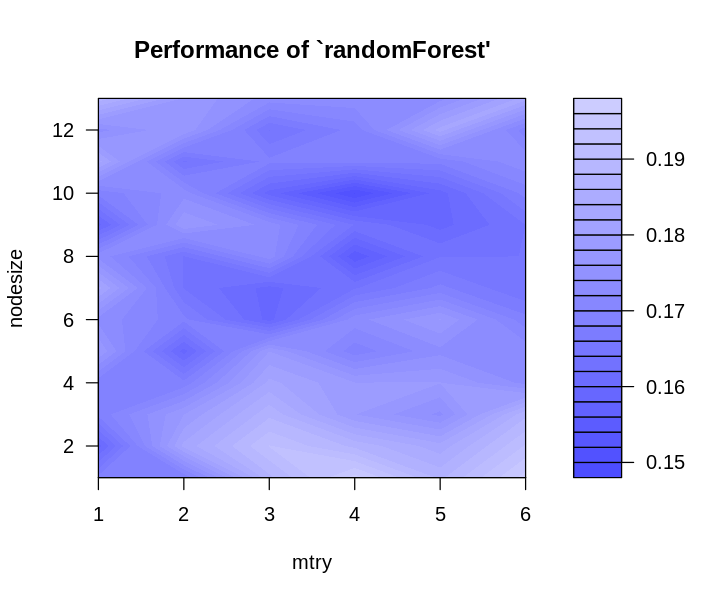

In [115]:
library("e1071")
set.seed(123)
tuning <- tune(randomForest, num~thal+ca+cp+slope+oldpeak+thalach, data = train_set,ranges = list(mtry=(1:6), nodesize=(1:13)),tunecontrol = tune.control(cross=5))
summary(tuning)
plot(tuning)

## Random forest model with mtry=2 and nodesize=7

In [118]:
set.seed(123)
df.rf <- randomForest(data=train_set, num~ thal+ca+cp+slope+oldpeak+thalach , mtry=2, nodesize=7,  importance=TRUE, keep.forest=TRUE)


df_prediction <- predict(df.rf, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = `...1`)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = `...1`) 
df_metrics

df_conf_mat

rf_27_accuracy<-df_metrics%>%slice(1)%>%pull()
rf_27_accuracy

New names:
* NA -> ...1



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8000000
kap,binary,0.5968143


          Truth
Prediction  0  1
         0 40  9
         1  9 32

[1] 0.8

## Random forest model with mtry=4 and nodesize=10

In [119]:
set.seed(123)

df.rf <- randomForest(data=train_set, num~ thal+ca+cp+slope+oldpeak+thalach , mtry=1, nodesize=2,  importance=TRUE, keep.forest=TRUE)


df_prediction <- predict(df.rf, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = `...1`)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = `...1`) 
df_metrics

df_conf_mat

rf_410_accuracy<-df_metrics%>%slice(1)%>%pull()
rf_410_accuracy

New names:
* NA -> ...1



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7888889
kap,binary,0.5735661


          Truth
Prediction  0  1
         0 40 10
         1  9 31

[1] 0.7888889

## Logistic regression

In [120]:
library(nnet)

logis_mod <- multinom(data=train_set, formula=num ~ thal+ca+cp+slope+oldpeak+thalach, trace=TRUE)

df_prediction <- predict(logis_mod, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = `...1`)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = `...1`) 
df_metrics

df_conf_mat

lg_accuracy<-df_metrics%>%slice(1)%>%pull()
lg_accuracy

# weights:  16 (15 variable)
initial  value 147.640349 
iter  10 value 66.142803
iter  20 value 65.017298
iter  30 value 64.999144
iter  40 value 64.989954
iter  50 value 64.989149
iter  60 value 64.987313
final  value 64.987193 
converged


New names:
* NA -> ...1



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7444444
kap,binary,0.4837905


          Truth
Prediction  0  1
         0 38 12
         1 11 29

[1] 0.7444444

## Tuning parameters for SVM


Parameter tuning of ‘svm’:

- sampling method: 5-fold cross validation 

- best parameters:
       gamma cost
 0.001953125   16

- best performance: 0.1405316 

- Detailed performance results:
           gamma cost     error dispersion
1   2.441406e-04    2 0.4596899 0.10037158
2   4.882812e-04    2 0.4550388 0.10583567
3   9.765625e-04    2 0.2431894 0.12961448
4   1.953125e-03    2 0.1732004 0.07795165
5   3.906250e-03    2 0.1593577 0.04981912
6   7.812500e-03    2 0.1499446 0.06223561
7   1.562500e-02    2 0.1499446 0.06223561
8   3.125000e-02    2 0.1499446 0.04744231
9   6.250000e-02    2 0.1544850 0.05243898
10  1.250000e-01    2 0.1641196 0.03174453
11  2.500000e-01    2 0.1827243 0.03993626
12  5.000000e-01    2 0.1781838 0.02486274
13  1.000000e+00    2 0.2066445 0.05440802
14  2.000000e+00    2 0.2254707 0.07091205
15  4.000000e+00    2 0.3238095 0.09691457
16  8.000000e+00    2 0.3614618 0.11607481
17  1.600000e+01    2 0.4507198 0.09643458
18  3.200000e+01    2 0.4976744 

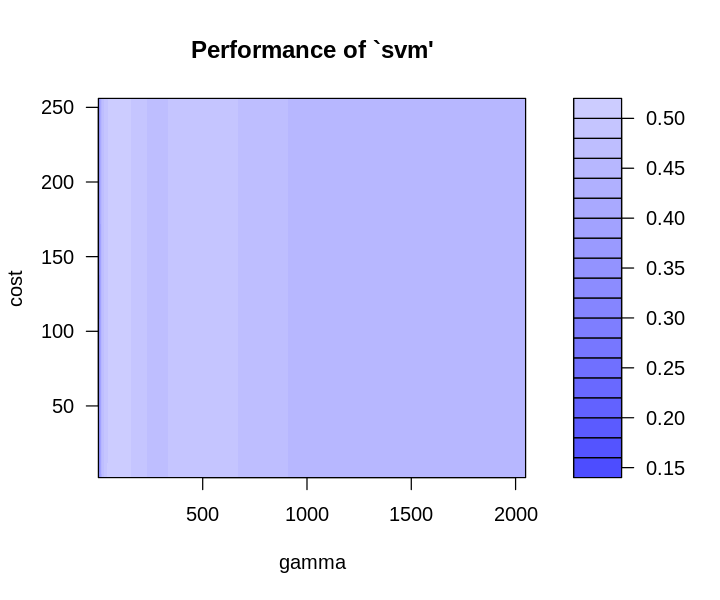

In [109]:
library("e1071")
set.seed(123)
tuning <- tune(svm, num~thal+ca+cp+slope+oldpeak+thalach, data = train_set,ranges = list(gamma = 2^(-12:11), 
                                                          cost = 2^(1:8)),tunecontrol = tune.control(cross=5))
summary(tuning)
plot(tuning)

## Support Vector machine with best 6 variables

In [110]:
set.seed(123)

svm_mod <- svm(data=train_set, num ~ thal+ca+cp+slope+oldpeak+thalach , kernel="radial", 
               gamma= 0.001953125 , cost=16)

df_prediction <- predict(svm_mod, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = `...1`)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = `...1`) 
df_metrics

df_conf_mat

svm_accuracy<-df_metrics%>%slice(1)%>%pull()
svm_accuracy

New names:
* NA -> ...1



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8222222
kap,binary,0.6430342


          Truth
Prediction  0  1
         0 40  7
         1  9 34

[1] 0.8222222

We make a table to compare which model has the best performance

In [122]:
tibble(knn_accuracy,rf_27_accuracy,rf_410_accuracy,lg_accuracy,svm_accuracy)

knn_accuracy,rf_27_accuracy,rf_410_accuracy,lg_accuracy,svm_accuracy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8,0.8,0.7888889,0.7444444,0.8222222


Through the table above that we found out all the model has the similar performance and svm model has the highest accuracy.